# CNN 학습 실습

## Import modules

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout #Convolution , pooling,  Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/home/toojey7/anaconda3/envs/mldl/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## 하이퍼파라미터 정의

In [2]:
EPOCHS = 10

## 네트워크 구조 정의

In [3]:
#keras의 sequential 방식을 활용해서 CNN 구현 가능
def MyModel():
    return Sequential([Conv2D(32,(3,3),padding='same',activation='relu'), #28*28*32
                       MaxPool2D(),                                        #14*14*32
                       Conv2D(64,(3,3),padding='same',activation='relu'),  #14*14*64 
                       MaxPool2D(),                                        #7*7*64
                       Conv2D(128,(3,3),padding='same',activation='relu'), #7*7*128
                       Flatten(),                                          #6272
                       Dense(128,activation='relu'),                       #128
                       Dense(10,activation='softmax')])                    #10
#각각의 kernel 개수 및 kernel size
#padding : same -> zero padding , valid: no zero padding
    

## 데이터 불러오기

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32) 

x_train=x_train[...,np.newaxis] #... represents all of the elements
x_test=x_test[...,np.newaxis]

# N * H * W * C 인 형태의 dataset을 만들어줘야한다.

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(2048)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(2048)

In [5]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


## 모델 생성

In [6]:
model = MyModel()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 모델 학습

In [7]:
history=model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS)

Train for 1875 steps, validate for 313 steps
Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3942 - accuracy: 0.8563 - val_loss: 0.3091 - val_accuracy: 0.8850
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2536 - accuracy: 0.9068 - val_loss: 0.2601 - val_accuracy: 0.9052
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2068 - accuracy: 0.9228


KeyboardInterrupt: 

In [9]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6167632906992318090
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6871170659925144629
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15956161332
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4181144195320385050
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 17492582536693804121
physical_device_desc: "device: XLA_GPU device"
]


Text(0.5, 1.0, 'Training and Validation Loss')

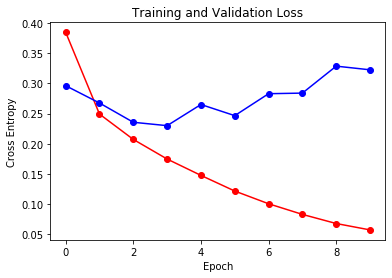

In [10]:
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure()
plt.plot(loss,'ro-') # r->read o->circle points - ->point connected with lines
plt.plot(val_loss,'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')

In [10]:
max(history.history['val_accuracy'])

0.9236

In [11]:
early_stopper=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,verbose=1)

In [12]:
history=model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS,callbacks=[early_stopper])

Train for 1875 steps, validate for 313 steps
Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0505 - accuracy: 0.9811 - val_loss: 0.3679 - val_accuracy: 0.9209
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0421 - accuracy: 0.9843 - val_loss: 0.4016 - val_accuracy: 0.9161
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0396 - accuracy: 0.9858 - val_loss: 0.4431 - val_accuracy: 0.9159
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0332 - accuracy: 0.9873 - val_loss: 0.4758 - val_accuracy: 0.9187
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0370 - accuracy: 0.9871 - val_loss: 0.4666 - val_accuracy: 0.9195
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0293 - accuracy: 0.9896 - val_loss: 0.4633 - val_accuracy: 0.9226
Epoch 00006: early stopping


Text(0.5, 1.0, 'Training and Validation Loss With Early Stopping')

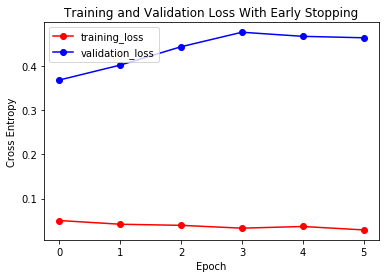

In [13]:
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure()
plt.plot(loss,'ro-') # r->read o->circle points - ->point connected with lines
plt.plot(val_loss,'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.legend(["training_loss","validation_loss"],loc='upper left')
plt.title('Training and Validation Loss With Early Stopping')

In [14]:
max(history.history['val_accuracy'])

0.9226

In [15]:
#keras의 sequential 방식을 활용해서 CNN 구현 가능
def MyModel():
    return Sequential([Conv2D(32,(3,3),padding='same',activation='relu'), #28*28*32
                       MaxPool2D(),                                        #14*14*32
                       Conv2D(64,(3,3),padding='same',activation='relu'),  #14*14*64 
                       MaxPool2D(),                                        #7*7*64
                       Conv2D(128,(3,3),padding='same',activation='relu'), #7*7*128
                       Flatten(),                                          #6272
                       Dense(128,activation='relu'),                       #128
                       Dropout(0.5),
                       Dense(10,activation='softmax')])                    #10
#각각의 kernel 개수 및 kernel size
#padding : same -> zero padding , valid: no zero padding

In [16]:
model = MyModel()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history=model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS)

Train for 1875 steps, validate for 313 steps
Epoch 1/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4906 - accuracy: 0.8242 - val_loss: 0.3201 - val_accuracy: 0.8819
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3136 - accuracy: 0.8878 - val_loss: 0.2703 - val_accuracy: 0.8991
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2647 - accuracy: 0.9055 - val_loss: 0.2620 - val_accuracy: 0.9047
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2349 - accuracy: 0.9157 - val_loss: 0.2337 - val_accuracy: 0.9149
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2104 - accuracy: 0.9235 - val_loss: 0.2318 - val_accuracy: 0.9173
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1878 - accuracy: 0.9306 - val_loss: 0.2416 - val_accuracy: 0.9183
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1676 -

Text(0.5, 1.0, 'Training and Validation Loss With Dropout')

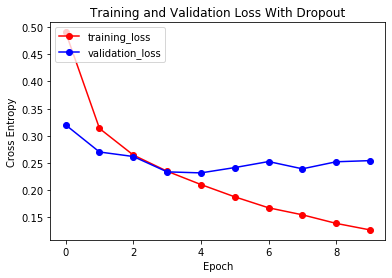

In [19]:
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure()
plt.plot(loss,'ro-') # r->read o->circle points - ->point connected with lines
plt.plot(val_loss,'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.legend(["training_loss","validation_loss"],loc='upper left')
plt.title('Training and Validation Loss With Dropout')

In [20]:
max(history.history['val_accuracy'])

0.9238

In [21]:
history=model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS,callbacks=[early_stopper])

Train for 1875 steps, validate for 313 steps
Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1144 - accuracy: 0.9560 - val_loss: 0.2751 - val_accuracy: 0.9224
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1056 - accuracy: 0.9599 - val_loss: 0.2885 - val_accuracy: 0.9208
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1026 - accuracy: 0.9613 - val_loss: 0.2946 - val_accuracy: 0.9219
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0972 - accuracy: 0.9631 - val_loss: 0.2929 - val_accuracy: 0.9228
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0879 - accuracy: 0.9664 - val_loss: 0.3494 - val_accuracy: 0.9249
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0845 - accuracy: 0.9679 - val_loss: 0.3683 - val_accuracy: 0.9231
Epoch 00006: early stopping


Text(0.5, 1.0, 'Training and Validation Loss With Early Stopping + Dropout')

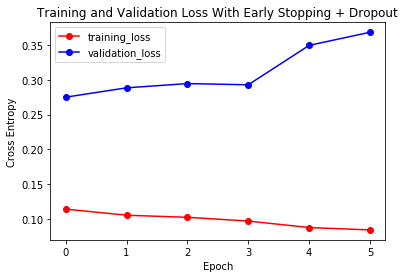

In [22]:
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure()
plt.plot(loss,'ro-') # r->read o->circle points - ->point connected with lines
plt.plot(val_loss,'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.legend(["training_loss","validation_loss"],loc='upper left')
plt.title('Training and Validation Loss With Early Stopping + Dropout')

In [23]:
max(history.history['val_accuracy'])

0.9249